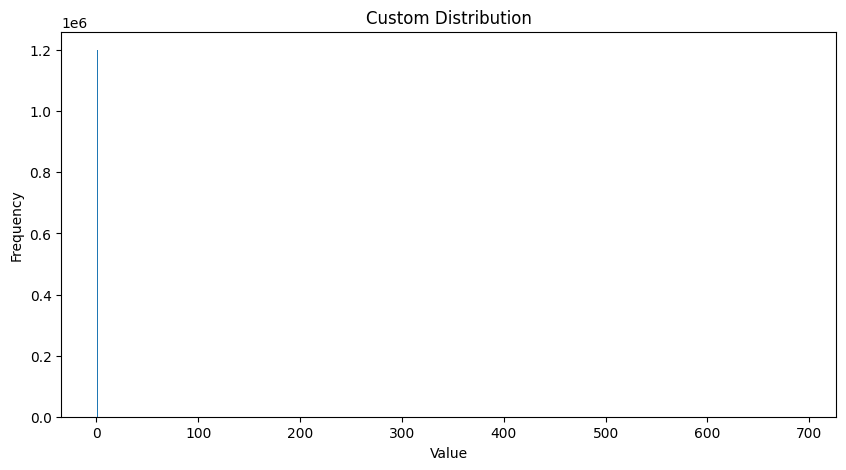

In [1]:
import numpy as np
import matplotlib.pyplot as plt

num_points1 = 1200000
num_points2 = 200000
max_values = [692, 550, 430]

# Create a lognormal distribution with 1,200,000 data points
mean1 = 0.065
sigma1 = 0.5
dist1 = np.random.lognormal(mean=np.log(mean1), sigma=sigma1, size=num_points1)
dist1 = np.clip(dist1, 0, 0.13)

# Create a uniform distribution for each maximum value
dist2 = np.concatenate([np.random.uniform(0.13, max_value, size=num_points2 // len(max_values)) for max_value in max_values])

# Combine the two distributions
dist = np.concatenate([dist1, dist2])

# Plot the histogram of the combined distribution
plt.figure(figsize=(10, 5))
plt.hist(dist, bins=500)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Custom Distribution")
plt.show()

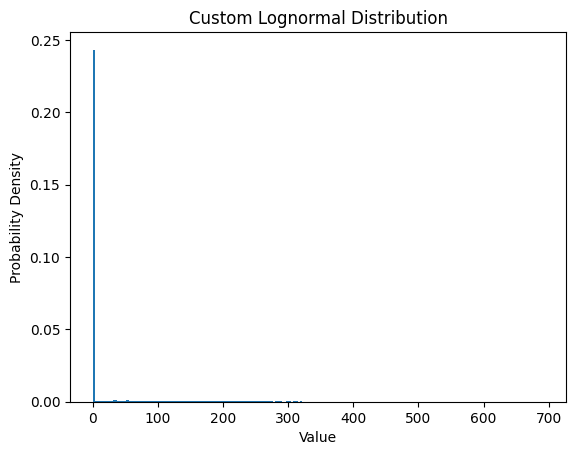

In [4]:
import numpy as np
import matplotlib.pyplot as plt

num_points_lower = 175_000
num_points_upper = 35_000
max_values = [692, 550, 198]

# Generate the lower part of the distribution (0 to 0.13 ETH)
lower_part = np.random.lognormal(mean=np.log(0.065), sigma=0.5, size=num_points_lower)
lower_part = lower_part[(lower_part >= 0) & (lower_part <= 0.13)]

# Generate the upper part of the distribution (0.13 ETH to max values)
upper_parts = []
for max_value in max_values:
    upper_part = np.random.lognormal(mean=np.log(max_value/3), sigma=1.0, size=num_points_upper // len(max_values))
    upper_part = upper_part[(upper_part > 0.13) & (upper_part <= max_value)]
    upper_parts.append(upper_part)

upper_part = np.concatenate(upper_parts)

# Combine both parts of the distribution
dist = np.concatenate([lower_part, upper_part])

# Plot the histogram
plt.hist(dist, bins=200, density=True, range=(0, max(max_values)))
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Custom Lognormal Distribution")
plt.show()


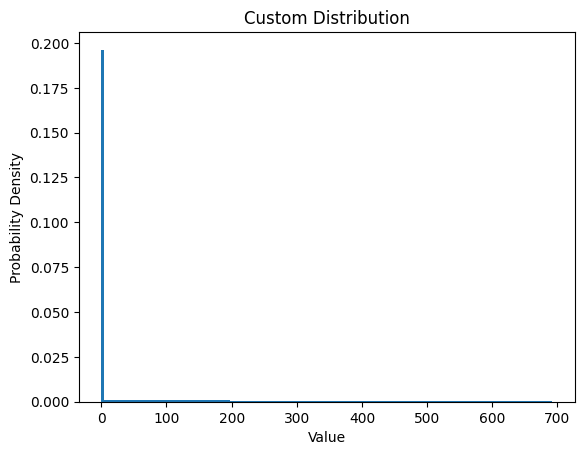

In [5]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 210_000
max_values = [692, 550, 198]
num_points_upper = 35_000
lower_range = (0, 0.13)

# Generate a lognormal distribution with a long tail
dist = np.random.lognormal(mean=np.log(0.065), sigma=1.5, size=num_points)

# Truncate the distribution between 0 and 0.13 ETH
truncated_dist = dist[(dist >= lower_range[0]) & (dist <= lower_range[1])]

# Calculate the number of data points we need to add to the upper part
num_points_to_add = num_points - len(truncated_dist)

# Add the remaining data points with specific maximum values
additional_points = []
for max_value in max_values:
    points = np.linspace(lower_range[1], max_value, num_points_to_add // len(max_values))
    additional_points.extend(points)

# Combine the truncated lower part and the additional upper part
final_dist = np.concatenate([truncated_dist, additional_points])

# Plot the histogram
plt.hist(final_dist, bins=200, density=True)
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.title("Custom Distribution")
plt.show()
